<a href="https://colab.research.google.com/github/jordanbell2357/uscg-nais-data/blob/main/BigQuery/MMSI_309955000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'ais-data-385301' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=ais-data-385301:US:bquxjob_678a2911_1886e9bcaa5)
back to BigQuery to edit the query within the BigQuery user interface.

In [ ]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_678a2911_1886e9bcaa5') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT * FROM `ais-data-385301.uscg.nais` WHERE MMSI = '309955000' ORDER BY BaseDateTime ASC;


# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [ ]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_678a2911_1886e9bcaa5') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results

MMSI              BaseDateTime       LAT        LON   SOG    COG  \
0     309955000 2022-06-12 12:54:31+00:00  48.47691 -126.40040  15.8   92.4   
1     309955000 2022-06-12 12:56:43+00:00  48.47652 -126.38573  15.8   92.9   
2     309955000 2022-06-12 12:58:02+00:00  48.47629 -126.37714  15.8   91.7   
3     309955000 2022-06-12 12:59:20+00:00  48.47609 -126.36854  15.8   92.1   
4     309955000 2022-06-12 13:00:07+00:00  48.47597 -126.36325  15.8   92.0   
...         ...                       ...       ...        ...   ...    ...   
9970  309955000 2022-06-24 23:59:14+00:00  38.98134 -135.27616  18.1  294.9   
9971  309955000 2022-06-24 23:59:14+00:00  38.31025 -133.42989  18.2  293.7   
9972  309955000 2022-06-24 23:59:14+00:00  37.76622 -132.03179  17.7  298.4   
9973  309955000 2022-06-24 23:59:44+00:00  39.18234 -135.87626  18.7  293.6   
9974  309955000 2022-06-24 23:59:44+00:00  38.55607 -134.07910  18.1  293.2   

      Heading VesselName         IMO CallSign VesselType Status  Length  \
0        91.0  ISTRA ACE  IMO9318503    C6WE7         70      0   175.0   
1        91.0  ISTRA ACE  IMO9318503    C6WE7         70      0   175.0   
2        91.0  ISTRA ACE  IMO9318503    C6WE7         70      0   175.0   
3        91.0  ISTRA ACE  IMO9318503    C6WE7         70      0   175.0   
4        91.0  ISTRA ACE  IMO9318503    C6WE7         70      0   175.0   
...       ...        ...         ...      ...        ...    ...     ...   
9970    295.0  ISTRA ACE  IMO9318503    C6WE7         70      0   175.0   
9971    297.0  ISTRA ACE  IMO9318503    C6WE7         70      0   175.0   
9972    302.0  ISTRA ACE  IMO9318503    C6WE7         70      0   175.0   
9973    296.0  ISTRA ACE  IMO9318503    C6WE7         70      0   175.0   
9974    295.0  ISTRA ACE  IMO9318503    C6WE7         70      0   175.0   

      Width  Draft Cargo TransceiverClass  
0      31.0    8.8    70                A  
1      31.0    8.8    70                A  
2      31.0    8.8    70                A  
3      31.0    8.8    70                A  
4      31.0    8.8    70                A  
...     ...    ...   ...              ...  
9970   31.0    8.8    70                A  
9971   31.0    8.8    70                A  
9972   31.0    8.8    70                A  
9973   31.0    8.8    70                A  
9974   31.0    8.8    70                A  

[9975 rows x 17 columns]

In [ ]:
results.count()

MMSI                9975
BaseDateTime        9975
LAT                 9975
LON                 9975
SOG                 9975
COG                 9975
Heading             9975
VesselName          9975
IMO                 9975
CallSign            9975
VesselType          9975
Status              9975
Length              9975
Width               9975
Draft               9975
Cargo               9975
TransceiverClass    9975
dtype: int64

In [ ]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9975 entries, 0 to 9974
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   MMSI              9975 non-null   object             
 1   BaseDateTime      9975 non-null   datetime64[ns, UTC]
 2   LAT               9975 non-null   float64            
 3   LON               9975 non-null   float64            
 4   SOG               9975 non-null   float64            
 5   COG               9975 non-null   float64            
 6   Heading           9975 non-null   float64            
 7   VesselName        9975 non-null   object             
 8   IMO               9975 non-null   object             
 9   CallSign          9975 non-null   object             
 10  VesselType        9975 non-null   object             
 11  Status            9975 non-null   object             
 12  Length            9975 non-null   float64            
 13  Wid

In [ ]:
print(sampled_data)
print(interpolated_data)

Empty DataFrame
Columns: [LAT, LON]
Index: []
Empty DataFrame
Columns: [LAT, LON]
Index: []


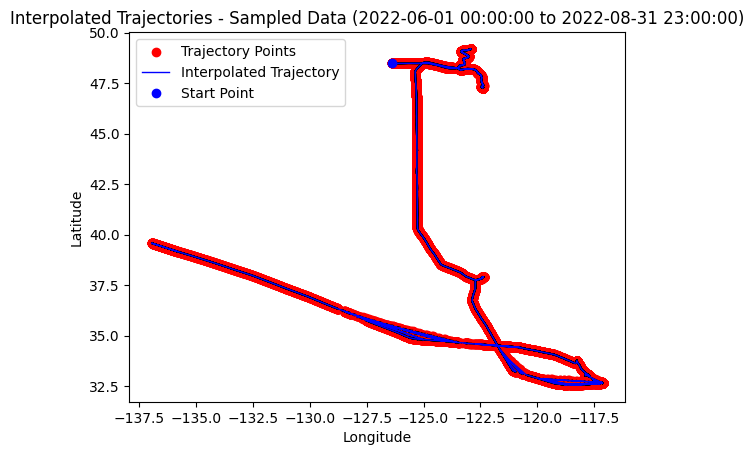

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Parameters
start_date = '2022-06-01 00:00:00'  # Include the desired hour
end_date = '2022-08-31 23:00:00'  # Include the desired hour
sampling_rate = '15min'  # Options: '1min', '5min', '10min', '15min', '30min', '1H', '2H', '3H', ...

# Define the DataFrame with desired columns
df = results[['BaseDateTime', 'LAT', 'LON']]

# Set the 'BaseDateTime' column as the DataFrame index
df.set_index('BaseDateTime', inplace=True)

# Convert to timezone naive UTC
df.index = df.index.tz_convert('UTC').tz_localize(None)

# Apply time cutoff
df = df.loc[start_date:end_date]

# Resample the data to the specified sampling rate
sampled_data = df.resample(sampling_rate).first()

# Interpolate the data for smooth trajectories
interpolated_data = sampled_data.interpolate(method='linear')

# Convert datetime to numerical values
time_vals = (interpolated_data.index - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

# Create an interpolation function for the latitude and longitude coordinates
interp_func = interp1d(
    time_vals,
    interpolated_data[['LAT', 'LON']],
    kind='linear',
    axis=0,
    fill_value='extrapolate'
)

# Generate new time points for finer sampling
new_time_vals = np.arange(time_vals.min(), time_vals.max(), 60)  # 60 seconds for 1-minute frequency

# Interpolate the latitude and longitude coordinates at the new time points
new_coords = interp_func(new_time_vals)

# Convert back to datetime format
new_time = pd.to_datetime(new_time_vals, unit='s')

# Create a scatter plot of the interpolated data
plt.scatter(
    new_coords[:, 1],
    new_coords[:, 0],
    c='red',
    marker='o',
    label='Trajectory Points'
)

# Create a line plot of the interpolated trajectory
plt.plot(
    new_coords[:, 1],
    new_coords[:, 0],
    '-',
    linewidth=1,
    color='blue',
    label='Interpolated Trajectory'
)

# Add a dot at the start of the trajectory
plt.plot(
    new_coords[0, 1],
    new_coords[0, 0],
    'bo',
    label='Start Point'
)

# Compute difference for arrow directions
d_coords = np.diff(new_coords, axis=0)

# Add styling with arrows indicating the direction of time
plt.quiver(
    new_coords[:-1, 1],
    new_coords[:-1, 0],
    d_coords[:, 1],
    d_coords[:, 0],
    angles='xy',
    scale_units='xy',
    scale=1,
    width=0.004,  # Increase the width to make the arrows wider
    color='black'
)

# Customize the plot
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Interpolated Trajectories - Sampled Data ({} to {})'.format(start_date, end_date))
plt.legend()

plt.show()

In [ ]:
df['TimeDifference'] = df.index.to_series().diff()

In [ ]:
df['TimeDifference'] = df['TimeDifference'].dt.total_seconds()

In [ ]:
df = df.iloc[1:]

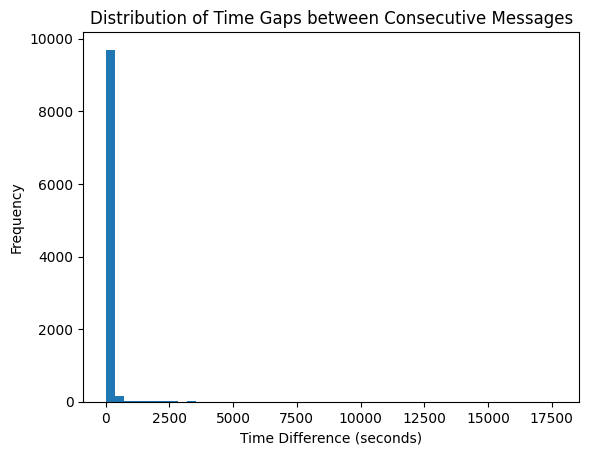

In [ ]:
df['TimeDifference'].plot(kind='hist', bins=50)
plt.xlabel('Time Difference (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Time Gaps between Consecutive Messages')
plt.show()

<ipython-input-16-069ae373b0e0>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TimeDifference'] = df.index.to_series().diff().dt.total_seconds()


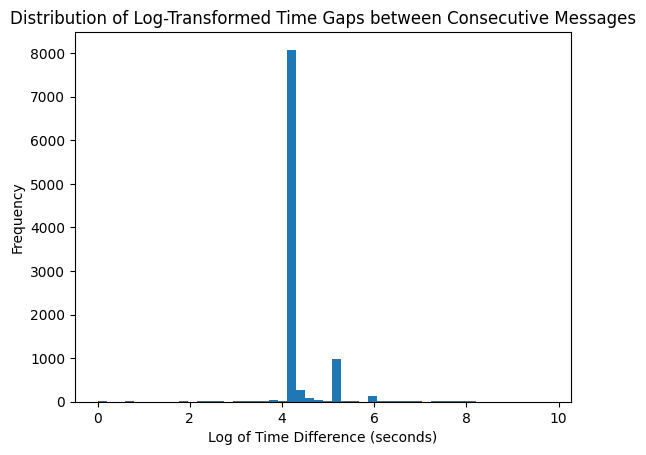

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = results[['BaseDateTime', 'LAT', 'LON']]

# Set the 'BaseDateTime' column as the DataFrame index
df.set_index('BaseDateTime', inplace=True)

# Convert to timezone naive UTC
df.index = df.index.tz_convert('UTC').tz_localize(None)

# Calculate the time differences in seconds
df['TimeDifference'] = df.index.to_series().diff().dt.total_seconds()

# Remove the first row (NaN value for 'TimeDifference')
df = df.iloc[1:]

# Apply log transformation
df['TimeDifferenceLog'] = np.log(df['TimeDifference'] + 1)  # We add 1 to avoid division by zero issues

# Plot the histogram of the log-transformed time differences
df['TimeDifferenceLog'].plot(kind='hist', bins=50)

plt.xlabel('Log of Time Difference (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Log-Transformed Time Gaps between Consecutive Messages')
plt.show()